In [ ]:
!pip3 install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=9141a54506ef93872bcb6c48b7cb7dbe848a7a58cace0dc26222d2d3aa3e80f9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('Battery_RUL.csv')

In [ ]:
df.sample(5)

Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
4961         668.0             1476.00                   424.8   
414          435.0             1746.37                   526.0   
2284         131.0             2094.38                   747.2   
14442        452.0             1605.15                   466.0   
12647        811.0             1287.36                   346.5   

       Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
4961                       3.882                    3.577           2678.312   
414                        3.959                    3.520           3566.319   
2284                       3.998                    3.418           4702.759   
14442                      3.929                    3.564           3128.383   
12647                      3.848                    3.634           2102.266   

       Time constant current (s)  Charging time (s)  RUL  
4961                     3536.31            8360.31  466  
414                      4472.32            8239.94  678  
2284                     5660.36            8763.66  977  
14442                    4004.38            8354.40  660  
12647                    2888.27            7984.77  297

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

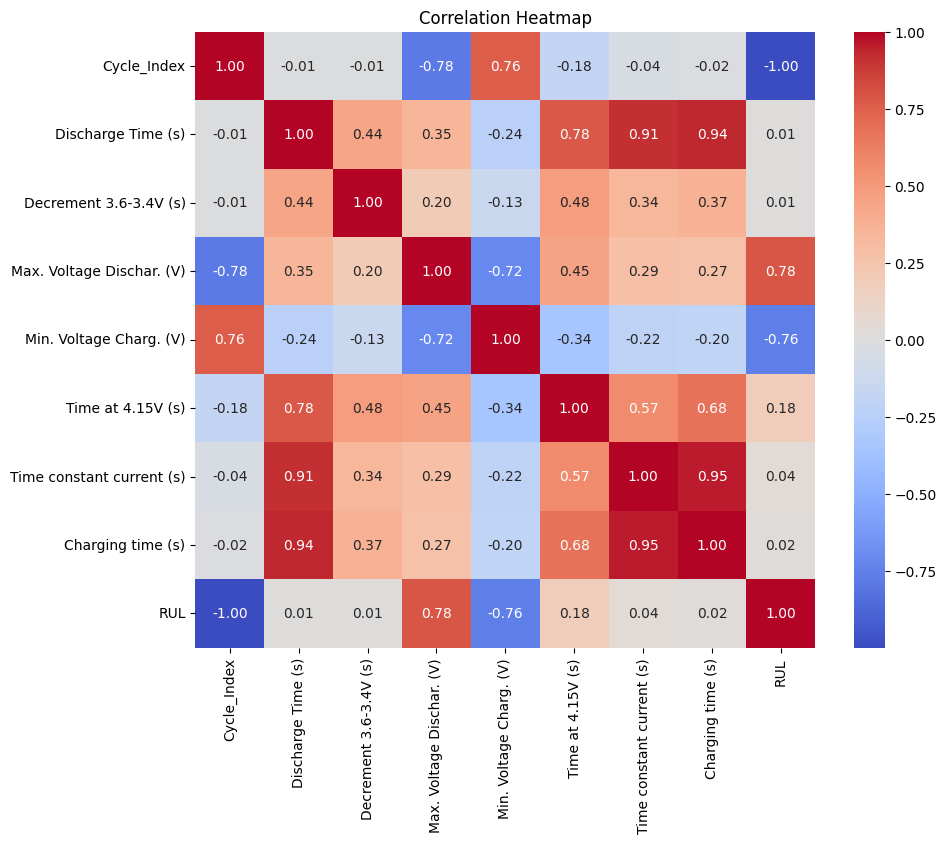

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

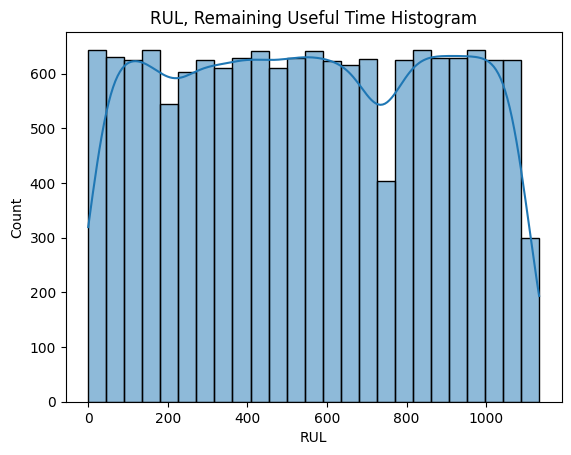

In [ ]:
plt.title('RUL, Remaining Useful Time Histogram')
sns.histplot(df.RUL, kde=True)
plt.show()

In [ ]:
data=df.drop(['Cycle_Index','Discharge Time (s)', 'Decrement 3.6-3.4V (s)','Time constant current (s)','Charging time (s)'],axis=1)

In [ ]:
data.head()

Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)   RUL
0                      3.670                    3.211           5460.001  1112
1                      4.246                    3.220           5508.992  1111
2                      4.249                    3.224           5508.993  1110
3                      4.250                    3.225           5502.016  1109
4                      4.290                    3.398           5480.992  1107

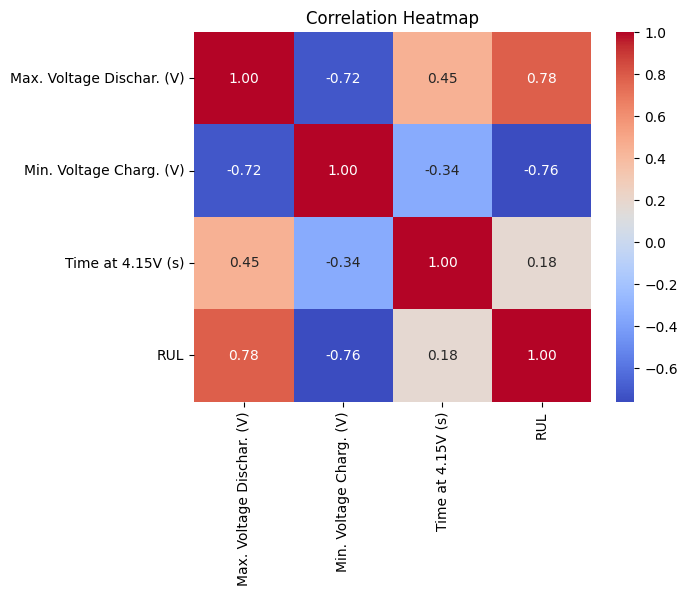

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

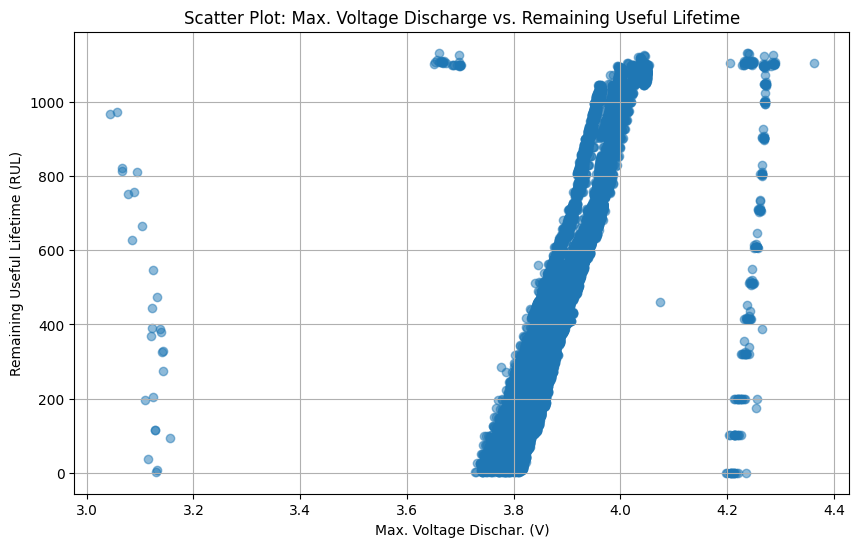

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Max. Voltage Dischar. (V)'], data['RUL'], alpha=0.5)
plt.title('Scatter Plot: Max. Voltage Discharge vs. Remaining Useful Lifetime')
plt.xlabel('Max. Voltage Dischar. (V)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)
plt.show()

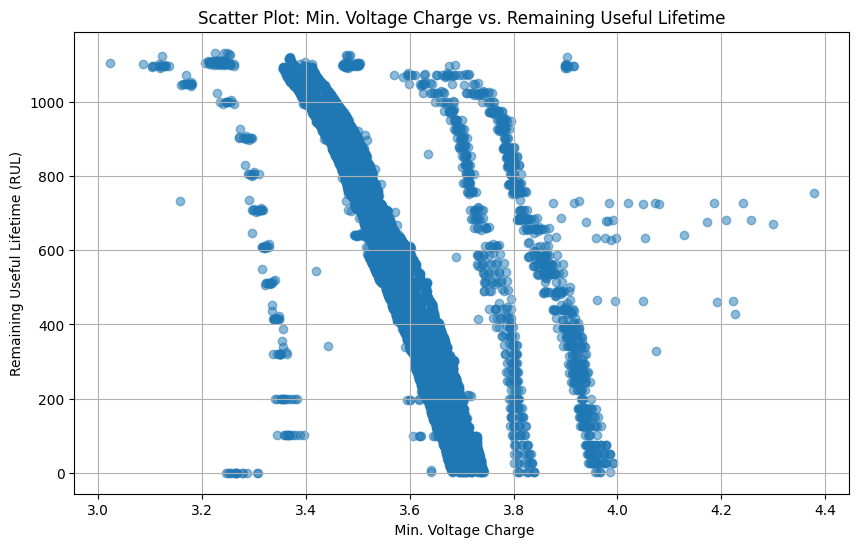

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Min. Voltage Charg. (V)'], data['RUL'], alpha=0.5)
plt.title('Scatter Plot: Min. Voltage Charge vs. Remaining Useful Lifetime')
plt.xlabel(' Min. Voltage Charge')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)
plt.show()

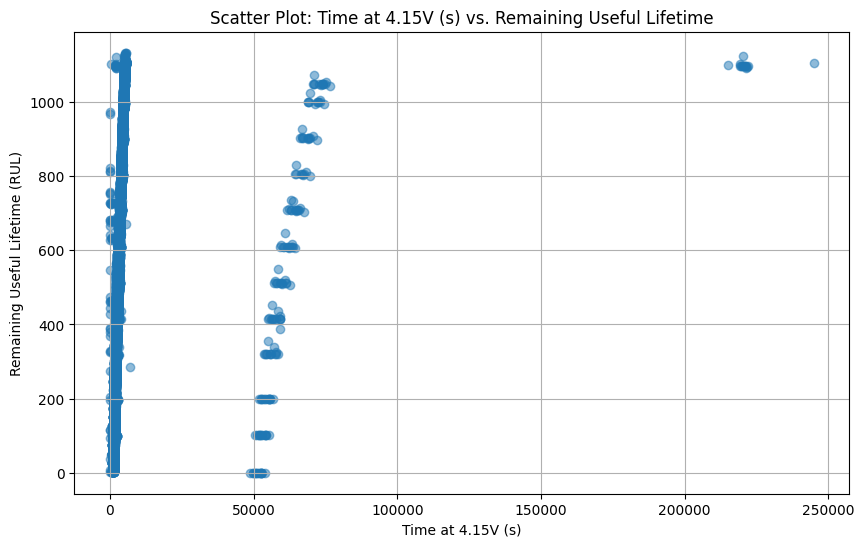

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Time at 4.15V (s)'], data['RUL'], alpha=0.5)
plt.title('Scatter Plot: Time at 4.15V (s) vs. Remaining Useful Lifetime')
plt.xlabel('Time at 4.15V (s)')
plt.ylabel('Remaining Useful Lifetime (RUL)')
plt.grid(True)
plt.show()

In [ ]:
X = data.drop('RUL', axis=1)
y = data['RUL']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lr =  LinearRegression()

In [ ]:
robust = RobustScaler()

In [ ]:
lr_pipe = Pipeline([
    ('robust',robust),
    ('lr',LinearRegression())
])

In [ ]:
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('robust', RobustScaler()), ('lr', LinearRegression())])

In [ ]:
y_pred = lr_pipe.predict(X_test)

In [ ]:
score_train = lr_pipe.score(X_train,y_train)
print(f'Train Score: {score_train}')

score_test = lr_pipe.score(X_test,y_test)
print(f'Test Score: {score_test}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Train Score: 0.7485397752867948
Test Score: 0.6764071821648161
R-squared: 0.6764071821648161


In [ ]:
model = KNeighborsRegressor(n_neighbors=3)


In [ ]:
knn_pipe = Pipeline([
    ('robust',robust),
    ('knn',model)
])

In [ ]:
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('robust', RobustScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=3))])

In [ ]:
y_pred = knn_pipe.predict(X_test)

In [ ]:
score_train = knn_pipe.score(X_train,y_train)
print(f'Train Score: {score_train}')

score_test = knn_pipe.score(X_test,y_test)
print(f'Test Score: {score_test}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Train Score: 0.9963151859324038
Test Score: 0.991651633008029
R-squared: 0.991651633008029


In [ ]:
svm_regressor = SVR(kernel='linear',C=1.0)

In [ ]:
svm_pipe = Pipeline([
    ('robust',robust),
    ('svm',svm_regressor)
])

In [ ]:
svm_pipe.fit(X_train,y_train)

Pipeline(steps=[('robust', RobustScaler()), ('svm', SVR(kernel='linear'))])

In [ ]:
y_pred= svm_pipe.predict(X_test)

In [ ]:
score_train = svm_pipe.score(X_train,y_train)
print(f'Train Score: {score_train}')

score_test = svm_pipe.score(X_test,y_test)
print(f'Test Score: {score_test}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Train Score: 0.7034874820224699
Test Score: 0.5588204157913687
R-squared: 0.5588204157913687


In [ ]:
decision_tree = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)


In [ ]:
dt_pipe = Pipeline([
    ('robust',robust),
    ('dt',decision_tree)
])

In [ ]:
dt_pipe.fit(X_train,y_train)

Pipeline(steps=[('robust', RobustScaler()), ('dt', DecisionTreeRegressor())])

In [ ]:
y_pred = dt_pipe.predict(X_test)

In [ ]:
score_train = dt_pipe.score(X_train,y_train)
print(f'Train Score: {score_train}')

score_test = dt_pipe.score(X_test,y_test)
print(f'Test Score: {score_test}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Train Score: 0.9999878306025038
Test Score: 0.9811487366917303
R-squared: 0.9811487366917303


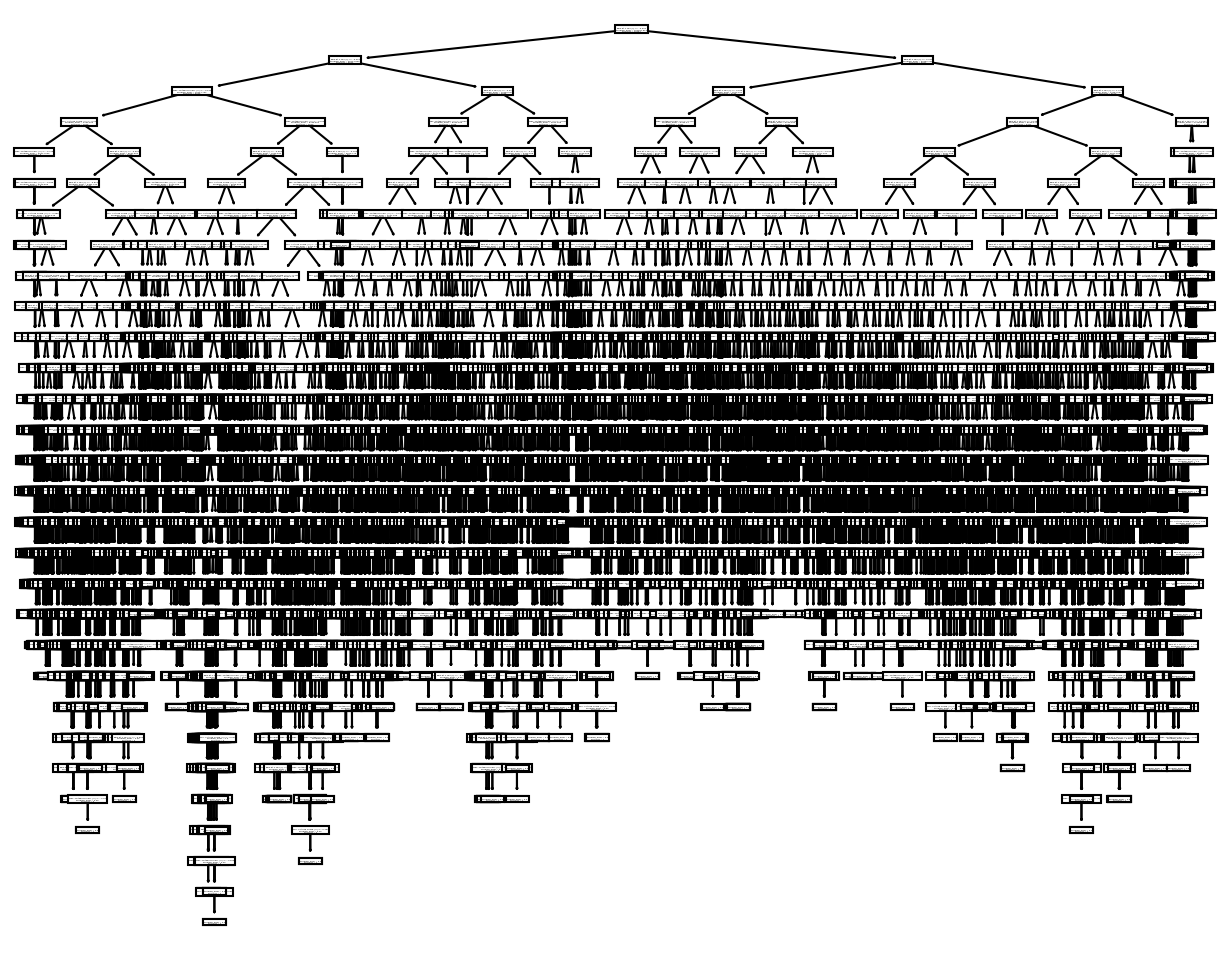

In [ ]:
plt.figure(figsize=(10,8), dpi=150)
plot_tree(decision_tree, feature_names=X.columns);
plt.show()

In [113]:
import pickle

In [114]:
pickle.dump(dt_pipe,open('dt_model.pkl','wb'))